In [1]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../src')
sys.path.append('../data')

from pathlib import Path

datap = Path('../data')
%reload_ext autoreload
%aimport load
%aimport utils
%aimport spectr

In [2]:
#from definitions import *
from load import read_rad_prof, read_pol_prof, load_binary

from scipy.signal import welch, csd, correlate, coherence
from scipy.signal import correlation_lags # Note: requires a recent version of SciPy

from utils import dt, R, NR, Z, dZ, dX, Bt, normalized, fluctuations, theta_array_OPA, Bt_array_OPA
from spectr import get_tau_corr, Corr_profile, nperseg, plot_spec

In [3]:
%autoreload 1

p_binary = datap / '20100920#007192/dat.npy'
Datp = load_binary('poloidal')


In [4]:
dat0 = Datp[0, 0]
dat1 = Datp[0, 1]
#dat2 = Datp[0, 2]

In [5]:
f, Pxx = welch(dat0, nperseg=4 * 256)
corr = correlate(normalized(dat0), normalized(dat1), method='fft') / dat0.size
lags = correlation_lags(dat0.size, dat1.size)
tau = lags * dt
f, coh = coherence(dat0, dat1, fs = 1/dt, nperseg=1024)

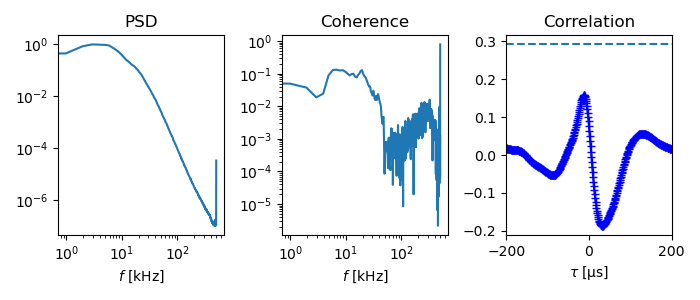

In [6]:
fig, axs = plt.subplots(1,3,figsize=(7,3))

[ax1,ax2,ax3] = axs
ax1.plot(f / 1e3, Pxx / Pxx.max())
ax2.plot(f / 1e3, coh)
ax3.plot(tau * 1e6, corr, 'b+-')

titles = ['PSD', 'Coherence', 'Correlation']
for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('$f$ [kHz]')
    
ax3.set_xlim(-200, 200)
ax3.set_xlabel(r'$\tau$ [µs]')
ax3.axhline(coh.max() / np.exp(1), ls='--')

for i, ax in enumerate(axs):
    ax.set_title(titles[i])
plt.tight_layout()

In [7]:
# compute a value proportional to the particle turbulent transport at a given time step and a given position
# Warning : three probes are needed for each measure, so the position is not accurate
def turbulent_transport(position, Nt):
    #position must be an integer between 0 and 31
    ntilde = Datp[2*position+1, Nt] - np.mean(Datp[2*position+1, Nt])
    
    if Nt == 0:
        vtilde = (Datp[(2*position + 2)%64, Nt]- Datp[2*position, Nt]  - np.mean(Datp[(2*position + 2)%64, Nt] - Datp[2*position, Nt]) )/(2*dX*Bt_array_OPA[2*position])
    
    Gamma = np.mean(ntilde*vtilde)
    
    return Gamma

    

In [8]:
theta_array_OPA[1 : 64:2].shape

(32,)

0.06711241098437501


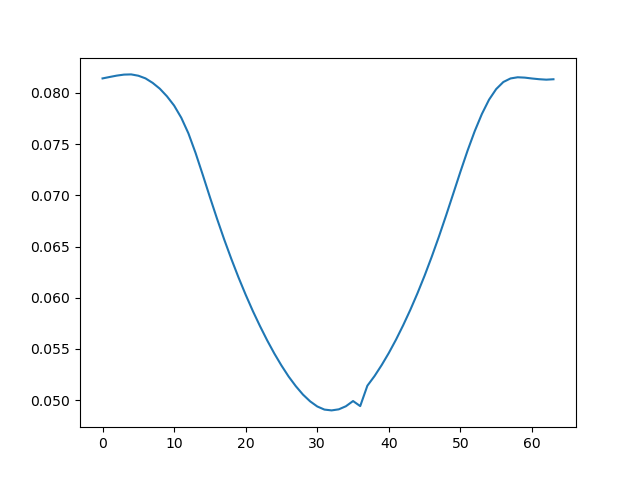

In [9]:
plt.figure()
plt.plot(Bt_array_OPA)
print(np.mean(Bt_array_OPA))

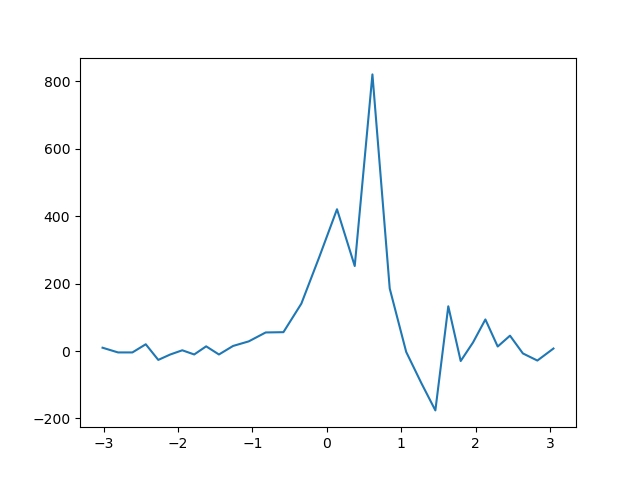

In [10]:
# the position of the measure will be the position of the probe that measures I_sat
# Nt = 0 for OPA
Gamma_OPA = np.zeros(32)

for position in range(32):
    Gamma_OPA[position] = turbulent_transport(position, 0)

plt.figure()
plt.plot(theta_array_OPA[1: :2], Gamma_OPA)
plt.show()

In [13]:
Gamma = turbulent_transport(16, 0)

In [14]:
Gamma

420.73492552855146

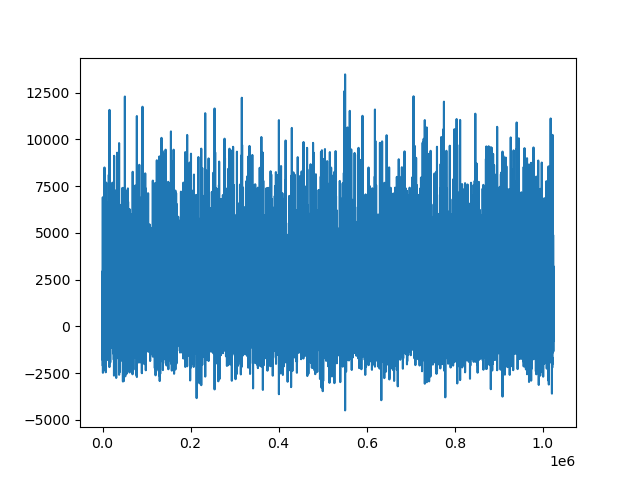

In [66]:
plt.figure()
plt.plot(vtilde*ntilde)
plt.show()

In [15]:
theta_array_OPA = np.array([-3.1235280, -3.0137569, -2.9073485, -2.8051417, -2.7071847, -2.6126248, -2.5215145, -2.4330854, -2.3478083, -2.2648591, -2.1842471, -2.1040693, -2.0234246, -1.9421344, -1.8614906, -1.7821543, -1.7024737, -1.6212623, -1.5376113, -1.4496697, -1.3572263, -1.2596373, -1.1571439, -1.0493933, -0.93729199, -0.82152736, -0.70318702, -0.58321263, -0.46279019, -0.34215081, -0.22190346, -0.10223254, 0.017224783, 0.13673208, 0.25606317, 0.37513834, 0.49413465, 0.61282050, 0.73003303, 0.84526151, 0.95768375, 1.0665708, 1.1713279, 1.2715163, 1.3671756, 1.4586130, 1.5469808, 1.6322630, 1.7158621, 1.7989729, 1.8817460, 1.9647129, 2.0477027, 2.1307102, 2.2136460, 2.2962418, 2.3788249, 2.4615021, 2.5462539, 2.6346722, 2.7287933, 2.8293017, 2.9353781, 3.0454504])
Bt_array_OPA    = np.array([81.413653,  81.554947, 81.688886, 81.785425, 81.805867, 81.677173, 81.418237, 80.978830, 80.410903, 79.665974, 78.762967, 77.573484, 76.043523, 74.128822, 72.002351, 69.823963, 67.703469, 65.680512, 63.775266, 61.973155, 60.285373, 58.697925, 57.225119, 55.836454, 54.551215, 53.374512, 52.301156, 51.361428, 50.541115, 49.880512, 49.379216, 49.074743, 48.995043, 49.098658, 49.399573, 49.909240, 49.413465, 51.404843, 52.347126, 53.423241, 54.605184, 55.900020, 57.305778, 58.811793, 60.431098, 62.159817, 64.012493, 65.972022, 68.033278, 70.161485, 72.300145, 74.362368, 76.264515, 77.940651, 79.336531, 80.374150, 81.064533,  81.410054, 81.525579, 81.490495, 81.405933, 81.336058, 81.291581, 81.331378])*10**(-3)



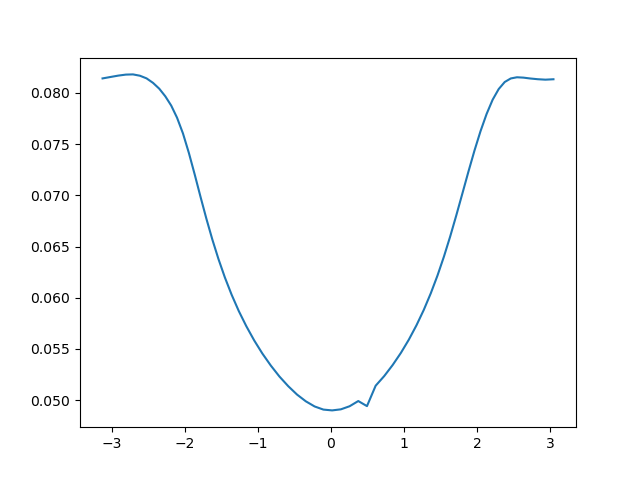

In [16]:
plt.figure()
plt.plot(theta_array_OPA, Bt_array_OPA)
plt.show()

In [17]:
np.shape(theta_array_OPA) 


(64,)

In [18]:
np.shape(Bt_array_OPA)

(64,)